<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Skim_Literature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the Project:

<pre>Project aims to skim the literature and classify its sections: objective, methods,background, results and conclusion.  
* <a href='https://arxiv.org/abs/1710.06071'>PubMed_20k</a> is used for training. 
* PubMed 20k is a subset of PubMed 200k. 
* PubMed_200k_RCT is the same as PubMed_200k_RCT_numbers_replaced_with_at_sign,
 except that in the latter all numbers had been replaced by @.
  (same for PubMed_20k_RCT vs. PubMed_20k_RCT_numbers_replaced_with_at_sign).
</pre>

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

### Load the data

In [2]:
# get data 
# !git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
# !ls pubmed-rct 

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [4]:
# check what files are available 
# !ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign 

dev.txt  test.txt  train.txt


In [3]:
# Check for filenames in directory 
data_dir = '/content/drive/MyDrive/Projects/text_summarizer/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/' 
folder_path = '/content/drive/MyDrive/Projects/text_summarizer/'

In [4]:
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames 

['/content/drive/MyDrive/Projects/text_summarizer/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/drive/MyDrive/Projects/text_summarizer/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/drive/MyDrive/Projects/text_summarizer/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [5]:
# function to read lines of a document 

def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [6]:
train_lines =get_lines(data_dir + 'train.txt')
train_lines[:20] 

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

### Preprocess to form DataFrame

In [19]:
def preprocess_text_with_line_numbers(filename):
  """ turning the datainyo following pattern:
  "line_number" - the position of the line in the abstract (e.g. 3).
  "target" - the role of the line in the abstract (e.g. OBJECTIVE).
  "text" - the text of the line in the abstract.
  "total_lines" - the total lines in an abstract sample 
  """  
  input_lines = get_lines(filename) # get all lines from file name
  abstract_lines = ""
  abstract_samples=[] 
  for line in input_lines:
    if line.startswith("###"): # check if it is id line
      abstract_id = line 
      abstract_lines = ""  # reset abstract string
    elif line.isspace(): # check to see if line a new line
        abstract_line_split = abstract_lines.splitlines()
        # iterate through line in abstract and count line
        for abstract_line_number, abstract_line in enumerate(abstract_line_split):
          line_data = {}
          target_text_split = abstract_line.split("\t")
          line_data['target'] = target_text_split[0]
          line_data['text'] = target_text_split[1].lower() 
          line_data['line_number'] = abstract_line_number
          line_data['total_lines'] = len(abstract_line_split) - 1
          abstract_samples.append(line_data) 
    else:
      abstract_lines+= line 

  return abstract_samples 


In [20]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples) 

(180040, 30212, 30135)

In [21]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [25]:
train_df= pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [27]:
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


### Explore the Data

In [29]:
train_df.target.value_counts() 

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

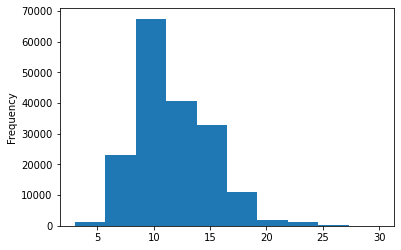

In [62]:
train_df.total_lines.plot.hist()

* Most abstract are around 7 to 15 sentences 


In [31]:
# Get list of strings for input 
# Convert abstract text lines into lists 
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [32]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

#### Encode for modelling

In [33]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [34]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded 

array([3, 2, 2, ..., 4, 1, 1])

In [35]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

### Experimentation for choosing the Model

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

tf_vector = TfidfVectorizer()
x_train = tf_vector.fit_transform(train_sentences)
y_test = tf_vector.transform(val_sentences)

model_dict = {
    'naive_bayes_multinomial':{
        'model':MultinomialNB()
    },
    'naive_bayes_bernouli':{
        'model':BernoulliNB()
    },
    'naive_bayes_ComplementNB':{
        'model':ComplementNB()
    },
    'logistic_regression':{
        'model':LogisticRegression()
    }
}

scores = []
for mn, nn in model_dict.items():
  clf = nn['model']
  clf.fit(x_train, train_labels_encoded)
  res = clf.score(X=y_test,y=val_labels_encoded)
  scores.append({
      'model':mn,
      'score':res
  })          

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
scores 

[{'model': 'naive_bayes_multinomial', 'score': 0.7218323844829869},
 {'model': 'naive_bayes_bernouli', 'score': 0.76592082616179},
 {'model': 'naive_bayes_ComplementNB', 'score': 0.7370250231696015},
 {'model': 'logistic_regression', 'score': 0.8017344101681451}]

<pre>* Naive Bayes Bernouli and Logistic regression has given better results
* max_iter, solver and C value is searched and optimum performing parameters are chosen.  </pre> 

In [57]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report                              
from sklearn.metrics import confusion_matrix
from sklearn import metrics  

In [99]:
lg=LogisticRegression(solver='saga',max_iter=350)
lg.fit(x_train, train_labels_encoded)
result = lg.score(X=y_test,y=val_labels_encoded)
result 

0.8021978021978022

In [89]:
# save the model 
import pickle
filename = folder_path+'skimlit_lreg_model'
pickle.dump(lg, open(filename, 'wb'))

In [90]:
# make prediction against validation dataset
test_sent = tf_vector.transform(test_sentences)
preds = lg.predict(test_sent)

In [91]:
print(preds)

[0 2 2 ... 4 4 1]


### Analyze the Results

In [92]:
# turn to classification report 
c_r = (classification_report(test_labels_encoded, preds, digits=4))
print(c_r)

              precision    recall  f1-score   support

           0     0.6431    0.6440    0.6436      3621
           1     0.7275    0.6981    0.7125      4571
           2     0.8472    0.9023    0.8739      9897
           3     0.6731    0.5234    0.5889      2333
           4     0.8533    0.8581    0.8557      9713

    accuracy                         0.7967     30135
   macro avg     0.7488    0.7252    0.7349     30135
weighted avg     0.7930    0.7967    0.7938     30135



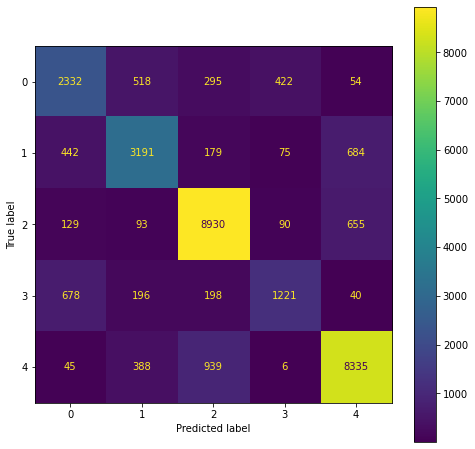

In [94]:
fig, ax = plt.subplots(figsize = (8,8))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = test_labels_encoded,
                                        y_pred = preds, ax=ax);

In [101]:
list(label_encoder.inverse_transform([0,1,2,3,4]))

['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']

* Methods section has been predicted more accurately. 
* This indicates that more amount of data is needed for remaining classes. 
* Class 'objective' and class 'conclusion' has lesser recall which indicates higher
number of False negatives usually result of imbalanced data. 
* Overall validation accuracy= 80.2% and test accuracy is 79.6%. 
* 'Background' class has been poorly detected. 
* Model has to be further improved considering the above observation. 